# BUSINESS CASE: BASED ON BRAIN MRI IMAGES DATASET WE NEED PREDICT BRAIN TUMOUR


# TASK: BINARY CLASSIFICATION

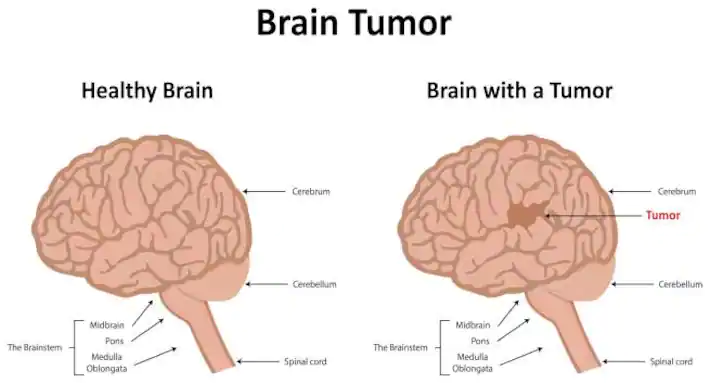

A brain tumour, known as a central nervous system tumour or an intracranial tumour, is an abnormal mass of cells that grows from either the brain or surrounding tissue. There are >150 types of brain tumour: some are cancerous (malignant) while some are non-cancerous (benign). They may grow slowly or quickly. Regardless of the type of tumour, the tumour can become large and compress the nearby nerves and blood vessels and hinder the brain’s functioning.

More men are affected by brain tumours than women, and it is more common in older people.

Brain tumours can be either primary or secondary. The tumour is primary if it has developed from the cells of the brain or its surrounding tissues; however, a tumour is metastatic or secondary if it originated from another organ and has migrated to the brain via the blood. Primary tumours may be benign or malignant, while metastatic tumours are always malignant.

# DATA SUMMARY
* Total 274 Jpg Images are present In two classes
1. No  ----> 119
2. Yes ----> 155

# DEVICE THE PROJECT INTO MULTIPLE STEPS
1. Prepare training, validation and testing set
2. Get all classes labels
3. Visualise training images
4. Used CNN & VGG19 model
5. Model Compilation
6. Model Training
7. Model Evaluation
8. Model Saving
9. Prediction on test data

# PYTHON IMPLIMENTATION

### IMPORTING NECESSARY LIBRARY

In [1]:
!nvidia-smi

Thu Jan  5 19:39:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8     2W /  N/A |     63MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Lambda, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import visualkeras
from glob import glob
import numpy as np
import cv2
import os


# Used to supress the warnings
import warnings
warnings.filterwarnings('ignore')

### DATA LOADING PREPARATION AND VISUALISATION

In [2]:
folder_path = r"C:\Users\hp\Downloads\Brain MRI Images for Brain Tumor Detection\dataset"
no_images = os.listdir(folder_path + '/no/')
yes_images = os.listdir(folder_path + '/yes/')

dataset = []
label = []

for image_name in no_images:
    image = cv2.imread(folder_path + '/no/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(0)
    
    
for image_name in yes_images:
    image = cv2.imread(folder_path + '/yes/' + image_name)
    image = Image.fromarray(image)
    image = image.resize((240,240))
    dataset.append(np.array(image))
    label.append(1)
    
    
dataset = np.array(dataset)
label = np.array(label)
print('Dataset Shape:',dataset.shape,'Label Shape:',label.shape)

Dataset Shape: (253, 240, 240, 3) Label Shape: (253,)


### SPLIT DATA INTO TRAINING AND TESTING

In [3]:
X_train,X_test,y_train,y_test = train_test_split(dataset,label, test_size=0.2,shuffle=True, random_state=42)

In [4]:
X_train.shape

(202, 240, 240, 3)

In [5]:
X_test.shape

(51, 240, 240, 3)

In [6]:
# Rescale the image by dividing every pixel of image by 255

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("X_train",X_train.shape)
print("X_train samples",X_train.shape[0]) # 0 is index no
print("X_test",X_test.shape[0]) # 0 is index no

X_train (202, 240, 240, 3)
X_train samples 202
X_test 51


### VISUALISE BOTH CLASSES IMAGES WITH THE HELP OF OPEN-CV

In [8]:
no = os.listdir(r"C:\Users\hp\Downloads\Brain MRI Images for Brain Tumor Detection\dataset\no")
print(no[:6])
yes = os.listdir(r"C:\Users\hp\Downloads\Brain MRI Images for Brain Tumor Detection\dataset\yes")
print(yes[:6])

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg']
['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg']


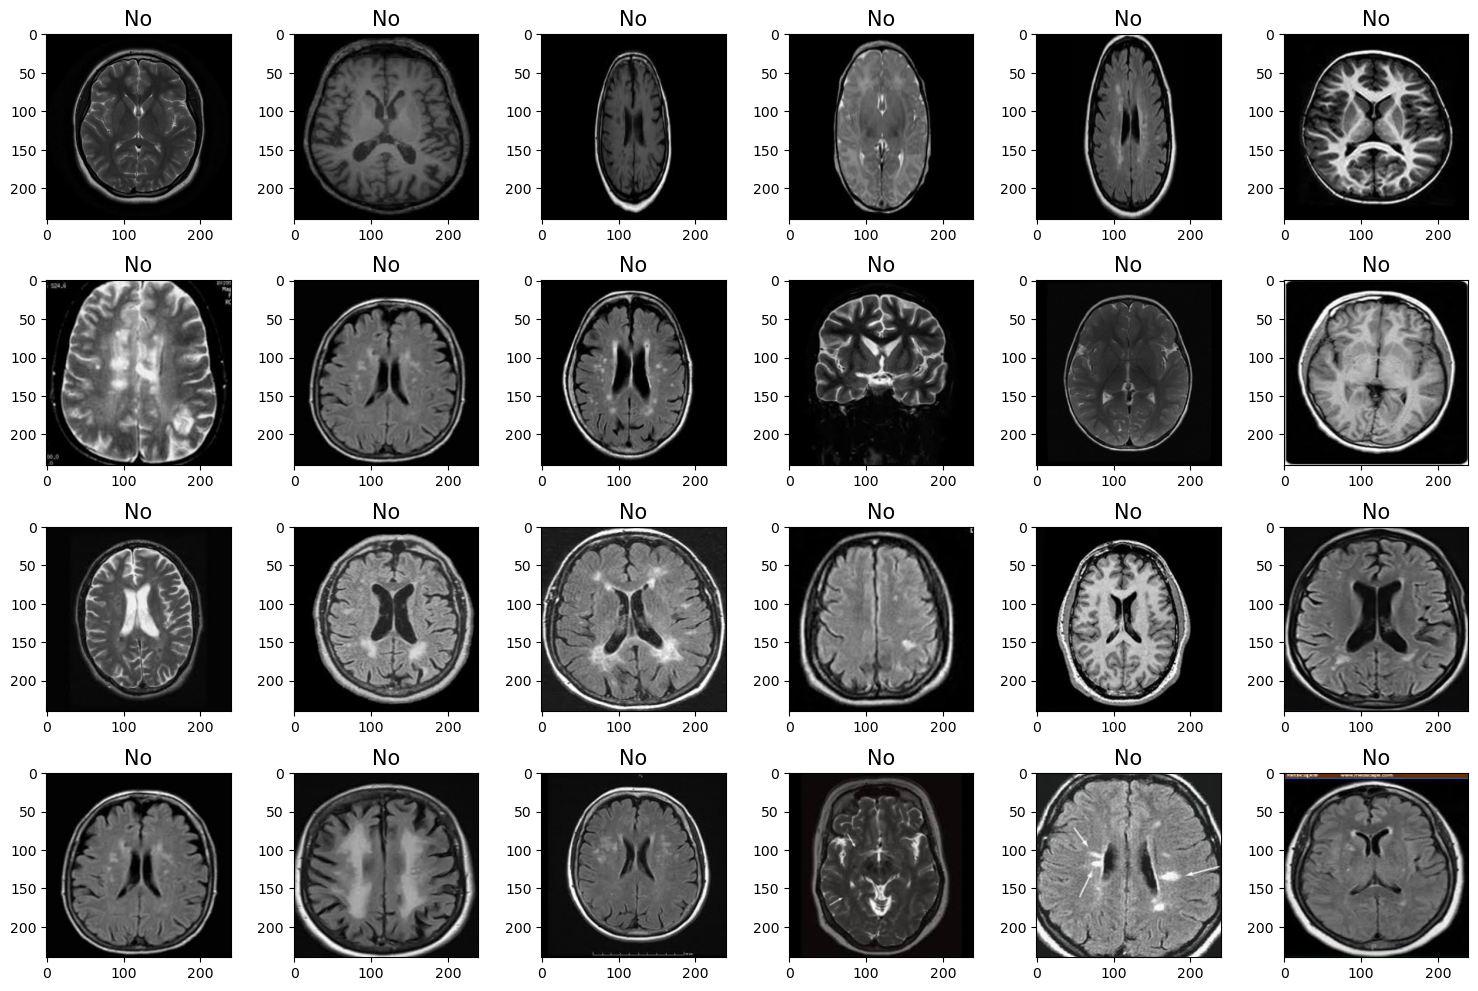

In [9]:
plt.figure(figsize=(15,10), facecolor='white')
for i in range(24):
    plt.subplot(4,6,i+1)
    img = cv2.imread(r"C:\Users\hp\Downloads\Brain MRI Images for Brain Tumor Detection\dataset\no" + '/' + no[i])
    resize_img = cv2.resize(img,(240,240))
    plt.imshow(resize_img)
    plt.title("No",fontsize=15)
plt.tight_layout()

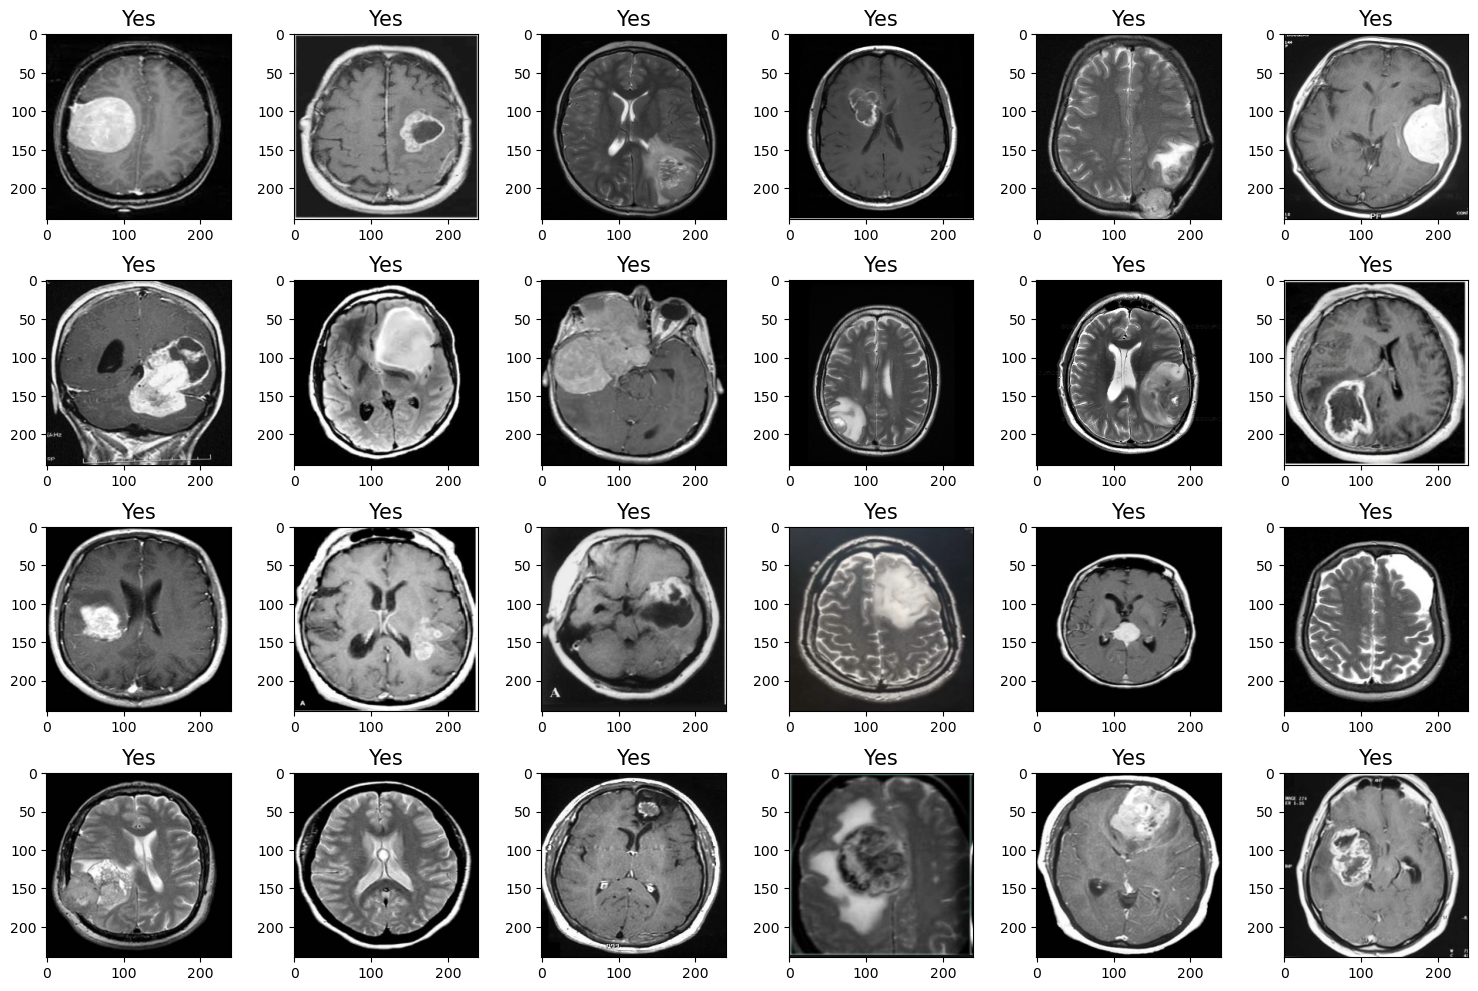

In [10]:
plt.figure(figsize=(15,10))
for j in range(24):
    plt.subplot(4,6,j+1)
    img = cv2.imread(r"C:\Users\hp\Downloads\Brain MRI Images for Brain Tumor Detection\dataset\yes" +  '/' + yes[j])
    resize = cv2.resize(img, (240,240))
    plt.imshow(resize)
    plt.title("Yes",fontsize=15)
plt.tight_layout()
    

### BUILD CNN ARCHITECTURE

In [11]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid",input_shape=(240,240,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3), 
                          bias_regularizer=regularizers.L2(1e-2),
                          activity_regularizer=regularizers.L2(1e-3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 119, 119, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                4

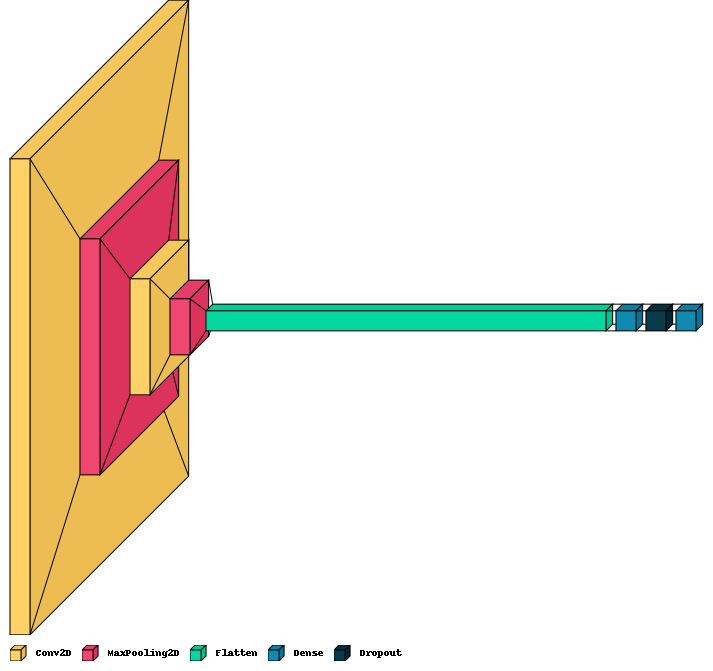

In [13]:
visualkeras.layered_view(model, legend=True)

### COMPILE & TRAIN MODEL

In [14]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [7]:
# Compute the class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
class_weights = dict(zip(np.unique(y_train),class_weights))
class_weights

{0: 1.294871794871795, 1: 0.8145161290322581}

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback = ModelCheckpoint(filepath='cnn_model.hdf5', save_best_only=True, monitor='val_loss',verbose=1)

history = model.fit(X_train,y_train, epochs=80, 
                    class_weight=class_weights, 
                    validation_data=(X_test,y_test), 
                    verbose=1,callbacks=callback)

Epoch 1/80
7/7 [==============================] - ETA: 0s - loss: 6.0919 - accuracy: 0.6584
Epoch 1: val_loss improved from inf to 4.63246, saving model to cnn_model.hdf5
7/7 [==============================] - 3s 260ms/step - loss: 6.0919 - accuracy: 0.6584 - val_loss: 4.6325 - val_accuracy: 0.7647
Epoch 2/80
7/7 [==============================] - ETA: 0s - loss: 4.0950 - accuracy: 0.7079
Epoch 2: val_loss improved from 4.63246 to 2.99122, saving model to cnn_model.hdf5
7/7 [==============================] - 1s 177ms/step - loss: 4.0950 - accuracy: 0.7079 - val_loss: 2.9912 - val_accuracy: 0.8039
Epoch 3/80
7/7 [==============================] - ETA: 0s - loss: 2.6236 - accuracy: 0.7129
Epoch 3: val_loss improved from 2.99122 to 1.84922, saving model to cnn_model.hdf5
7/7 [==============================] - 1s 165ms/step - loss: 2.6236 - accuracy: 0.7129 - val_loss: 1.8492 - val_accuracy: 0.8039
Epoch 4/80
7/7 [==============================] - ETA: 0s - loss: 1.7164 - accuracy: 0.7228


Epoch 30/80
7/7 [==============================] - ETA: 0s - loss: 0.4506 - accuracy: 0.9653
Epoch 30: val_loss did not improve from 0.60894
7/7 [==============================] - 1s 154ms/step - loss: 0.4506 - accuracy: 0.9653 - val_loss: 0.6987 - val_accuracy: 0.9216
Epoch 31/80
7/7 [==============================] - ETA: 0s - loss: 0.5069 - accuracy: 0.9307
Epoch 31: val_loss did not improve from 0.60894
7/7 [==============================] - 1s 192ms/step - loss: 0.5069 - accuracy: 0.9307 - val_loss: 0.6652 - val_accuracy: 0.9216
Epoch 32/80
7/7 [==============================] - ETA: 0s - loss: 0.4800 - accuracy: 0.9703
Epoch 32: val_loss did not improve from 0.60894
7/7 [==============================] - 1s 166ms/step - loss: 0.4800 - accuracy: 0.9703 - val_loss: 0.6404 - val_accuracy: 0.8824
Epoch 33/80
7/7 [==============================] - ETA: 0s - loss: 0.4802 - accuracy: 0.9455
Epoch 33: val_loss did not improve from 0.60894
7/7 [==============================] - 1s 143ms/s

### PLOTTING TRAINING AND VALIDATION LOSS & ACCURACY

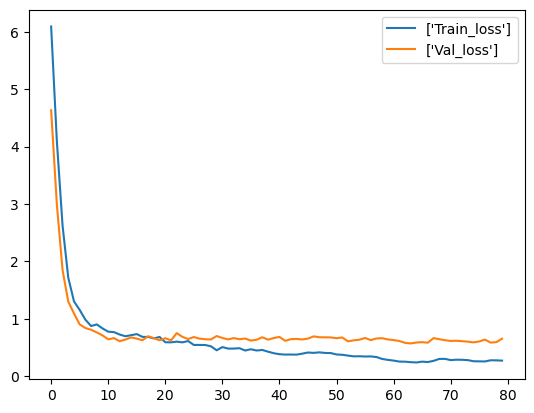

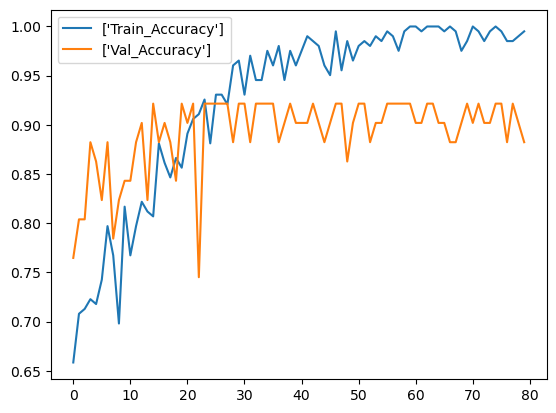

In [17]:
plt.plot(history.history['loss'],label=['Train_loss'])
plt.plot(history.history['val_loss'],label=['Val_loss'])
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label=['Train_Accuracy'])
plt.plot(history.history['val_accuracy'],label=['Val_Accuracy'])
plt.legend()
plt.show()

### MODEL EVALUATION

In [18]:
result = model.evaluate(X_test,y_test)
print("The Current Model Achived An Accuracy Of {}%".format(round(result[1]*100,2)))

2/2 [==============================] - 0s 25ms/step - loss: 0.6527 - accuracy: 0.8824
The Current Model Achived An Accuracy Of 88.24%


### USE VGG19 TO GET BETTER RESULT

In [8]:
image_size = [240,240]
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [9]:
# Freeze the existing layer
for layer in vgg.layers:
    layer.trainable=False

In [10]:
# Adding more layers
x = Flatten()(vgg.output)
x = Dense(units=64, activation='relu', 
        kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-3), 
        bias_regularizer=regularizers.L2(1e-2),
        activity_regularizer=regularizers.L2(1e-3))(x)
prediction = Dense(1, activation='sigmoid')(x)
vgg_model = Model(vgg.input, outputs=prediction)

In [11]:
# Visualise the model summary
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 240, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 240, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 120, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 120, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 120, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 60, 60, 128)       0     

### VISUALISE THE MODEL

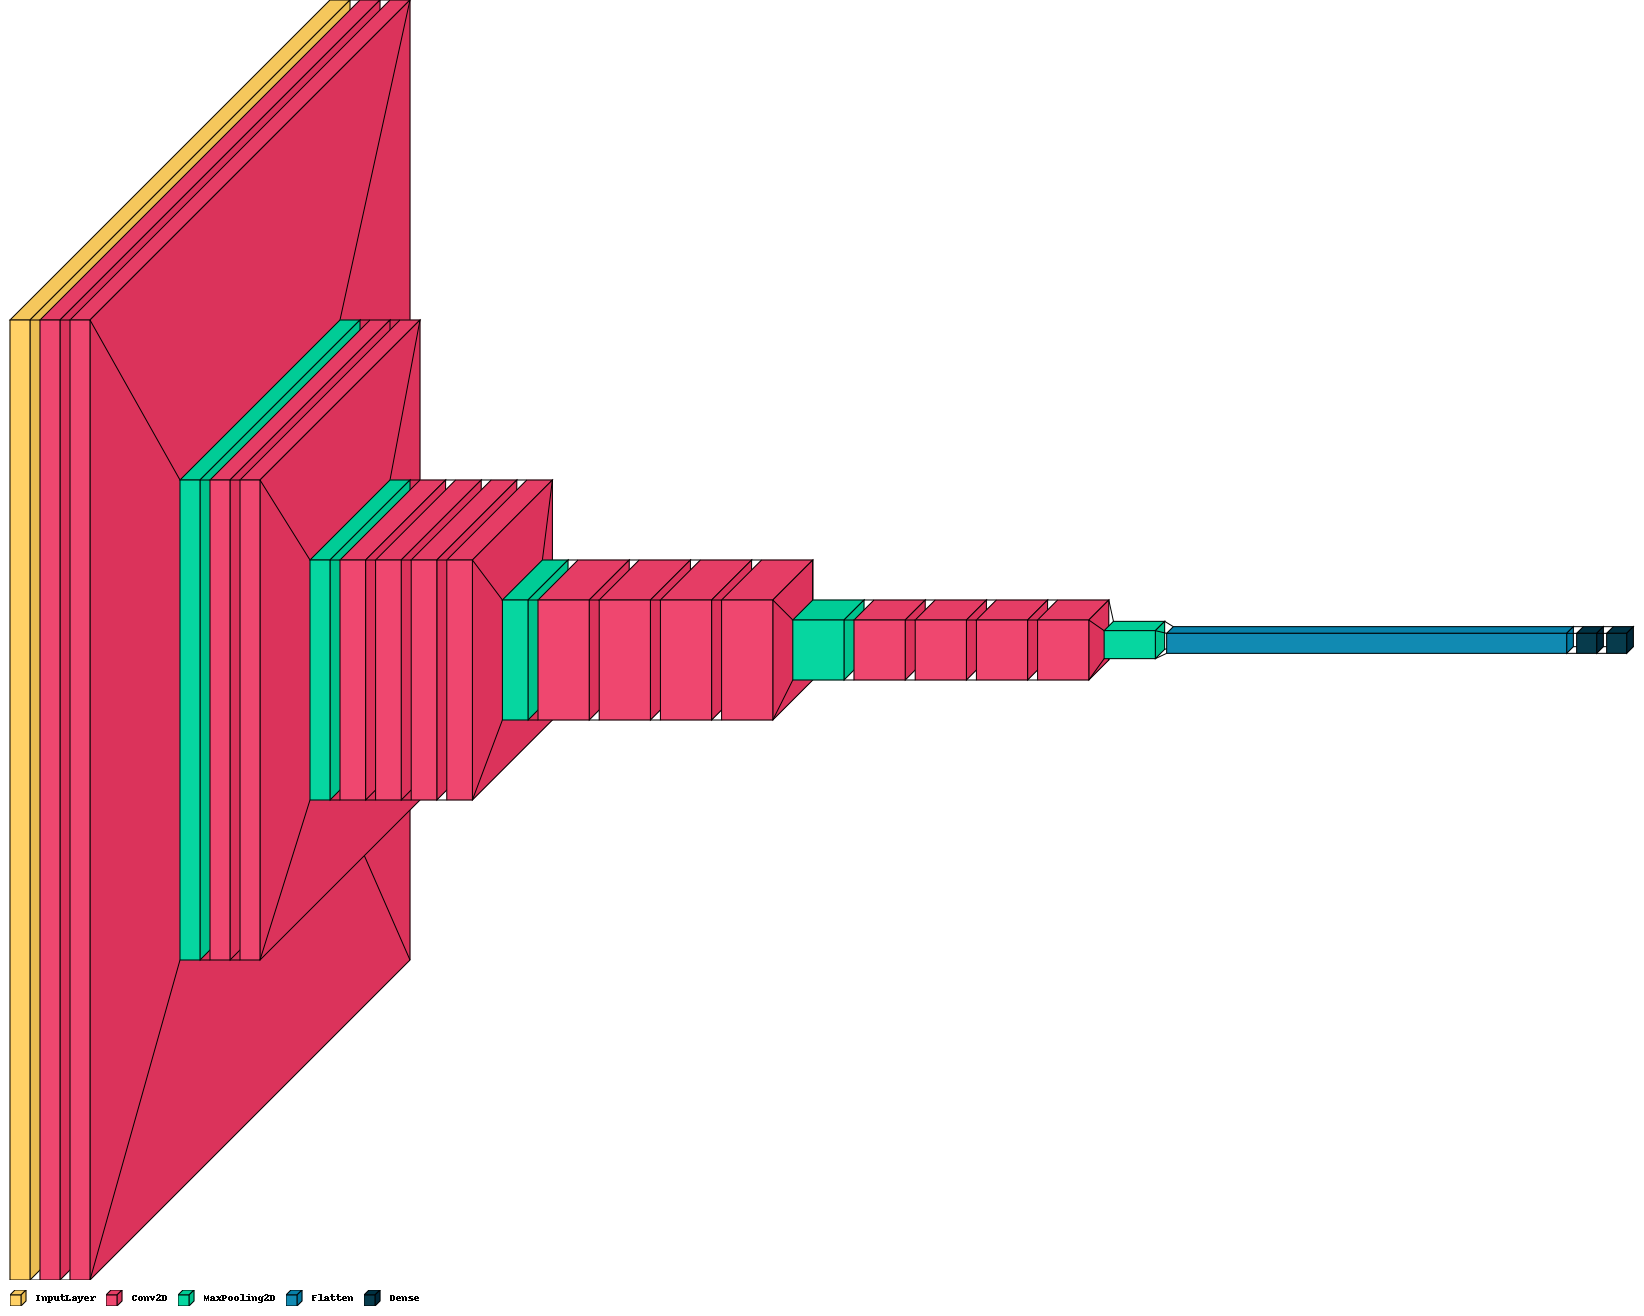

In [12]:
visualkeras.layered_view(vgg_model, legend=True)

### COMPILE & TRAIN MODEL

In [13]:
vgg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Fit model for training
history = vgg_model.fit(X_train,y_train, epochs=60,
             class_weight=class_weights,
             validation_data=(X_test,y_test),
             verbose=1)

Epoch 1/60
7/7 [==============================] - 41s 6s/step - loss: 11.9137 - accuracy: 0.5198 - val_loss: 6.7136 - val_accuracy: 0.7647
Epoch 2/60
7/7 [==============================] - 42s 6s/step - loss: 5.4601 - accuracy: 0.6238 - val_loss: 4.1213 - val_accuracy: 0.7255
Epoch 3/60
7/7 [==============================] - 41s 6s/step - loss: 3.9113 - accuracy: 0.7822 - val_loss: 3.4126 - val_accuracy: 0.8039
Epoch 4/60
7/7 [==============================] - 40s 6s/step - loss: 3.0944 - accuracy: 0.8069 - val_loss: 2.5718 - val_accuracy: 0.9020
Epoch 5/60
7/7 [==============================] - 41s 6s/step - loss: 2.4404 - accuracy: 0.8168 - val_loss: 2.1348 - val_accuracy: 0.8824
Epoch 6/60
7/7 [==============================] - 41s 6s/step - loss: 1.9921 - accuracy: 0.8515 - val_loss: 1.7836 - val_accuracy: 0.8824
Epoch 7/60
7/7 [==============================] - 41s 6s/step - loss: 1.6846 - accuracy: 0.8515 - val_loss: 1.5199 - val_accuracy: 0.9020
Epoch 8/60
7/7 [=================

Epoch 60/60
7/7 [==============================] - 41s 6s/step - loss: 0.4819 - accuracy: 0.9950 - val_loss: 0.6057 - val_accuracy: 0.9216


### PLOTTING TRAINING, VALIDATION ACCURACY AS WELL AS LOSS

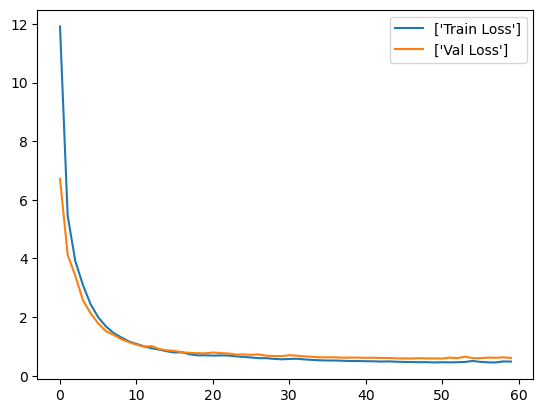

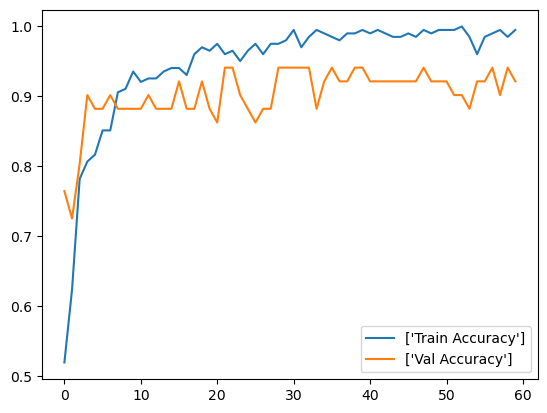

In [15]:
plt.plot(history.history['loss'], label=["Train Loss"])
plt.plot(history.history['val_loss'],label=['Val Loss'])
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=["Train Accuracy"])
plt.plot(history.history['val_accuracy'],label=['Val Accuracy'])
plt.legend()
plt.show()

### MODEL SAVING

In [16]:
vgg_model.save('VGG19_Model.h5')

### MODEL EVALUATION

In [17]:
result = vgg_model.evaluate(X_test,y_test)
print("Result of VGG19 Model {}%".format(round(result[1]*100,2)))

2/2 [==============================] - 8s 3s/step - loss: 0.6057 - accuracy: 0.9216
Result of VGG19 Model 92.16%


In [18]:
predictions = vgg_model.predict(X_test)
y_pred = []
for i in predictions:
    if i >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

2/2 [==============================] - 8s 3s/step


In [19]:
print(y_pred)

[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
